# Graphical Analysis and Google Trends Data

This notebook explores various aspects of car sales data, including trends in selling prices, car conditions, and popular models. Additionally, it incorporates Google Trends data to analyze the popularity of specific car models over time, aiming to identify patterns and correlations between online interest and sales performance.

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
# Custom KMeans class has been created, and can now be used for clustering
src_path = os.path.abspath(os.path.join('..', 'src'))
sys.path.append(src_path)
from kmeans import CustomKMeans, plot_clusters

# Import the cleaned data for use in the project
cleaned_data_path = os.path.abspath(os.path.join('..', 'data', 'cleaned', 'car_prices_cleaned.csv'))
car_df = pd.read_csv(cleaned_data_path)
car_df.head(5)

fordpickup = os.path.abspath(os.path.join('..', 'data', 'raw', 'google_trends', 'ford_pickup.csv'))
camry = os.path.abspath(os.path.join('..', 'data', 'raw', 'google_trends', 'toyota_camry.csv'))
altima = os.path.abspath(os.path.join('..', 'data', 'raw', 'google_trends', 'nissan_altima.csv'))

onefifty_df = pd.read_csv(fordpickup)
camry_df = pd.read_csv(camry)
altima_df = pd.read_csv(altima)


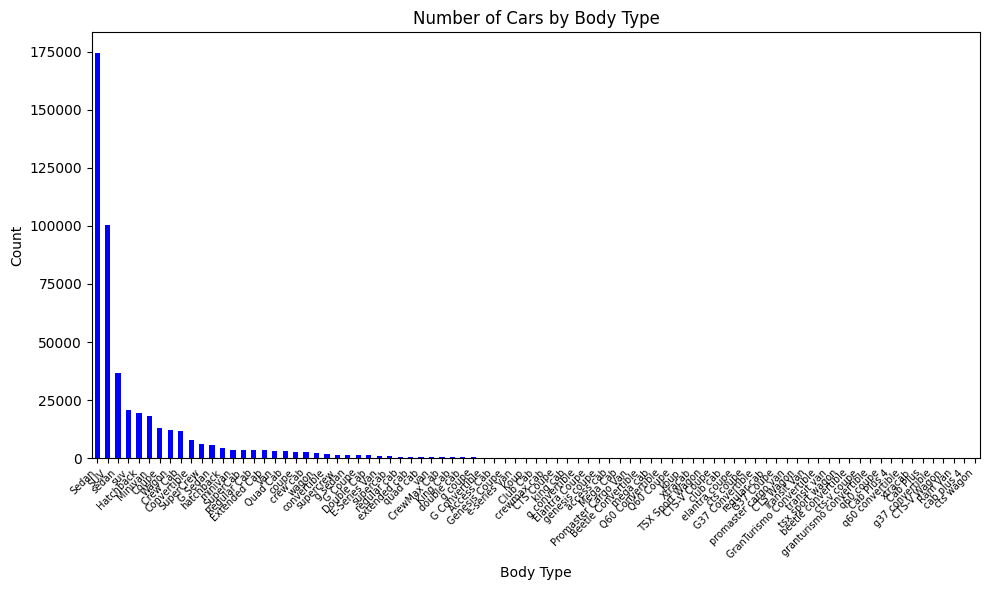

In [2]:
# What is the count of cars by body type

body_counts = car_df['body'].value_counts()
# body_counts = sorted(body_counts, key=lambda x: x[1], reverse= True)
# body_counts = body_counts[:len(body_counts-10)]
plt.figure(figsize=(10,6))
body_counts.plot(kind ='bar', color ='blue')
plt.title('Number of Cars by Body Type')
plt.xticks( rotation = 45, ha = 'right', fontsize = 7)
plt.xlabel('Body Type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()



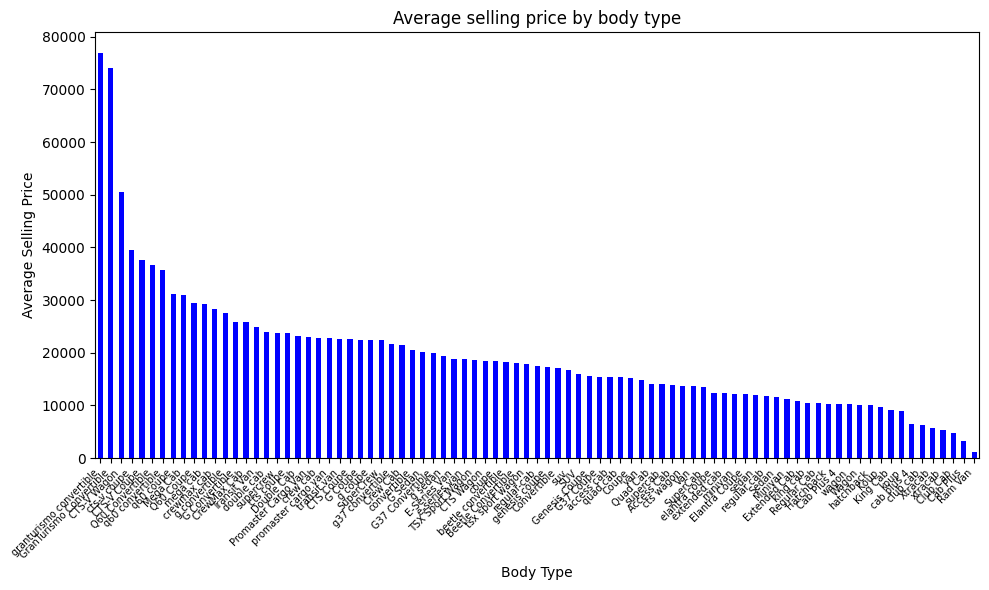

In [3]:
# What is the average selling price by body type?
avg_price_by_body = car_df.groupby('body')['sellingprice'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
avg_price_by_body.plot(kind = 'bar', color = 'blue')
plt.title('Average selling price by body type')
plt.xlabel('Body Type')
plt.ylabel('Average Selling Price')
plt.xticks( rotation = 45, ha = 'right', fontsize = 7)
plt.tight_layout()
plt.show()

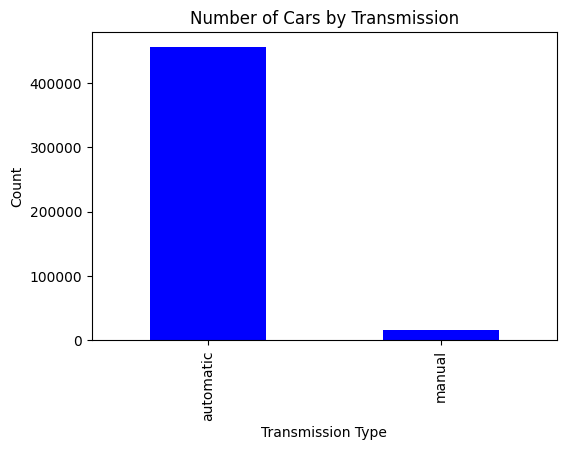

In [4]:
# What is the count of each car by transmission?

transmission_counts = car_df['transmission'].value_counts()
plt.figure(figsize=(6,4))
transmission_counts.plot(kind='bar', color='blue')
plt.title('Number of Cars by Transmission')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.show()

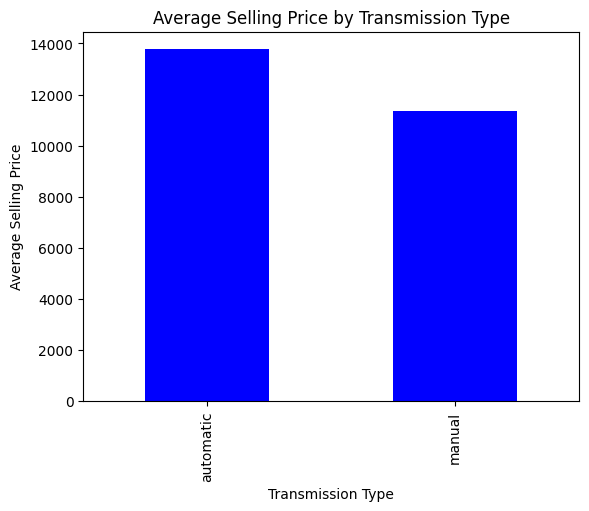

In [5]:
# What is the average selling price by transmission type?
avg_price_by_transmission = car_df.groupby('transmission')['sellingprice'].mean()
plt.figure()
avg_price_by_transmission.plot(kind='bar', color ='blue')
plt.title('Average Selling Price by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Average Selling Price')
plt.show()

In [6]:
# Is there a correlation betwen car age and condition?
plt.figure()
plt.scatter(car_df['car_age'], car_df['condition'], alpha = .6)
plt.title('Car Age vs. Condition')
plt.xlabel('Car Age')
plt.ylabel('Condition')
plt.show()

# Nah there definitely is

KeyError: 'car_age'

<Figure size 640x480 with 0 Axes>

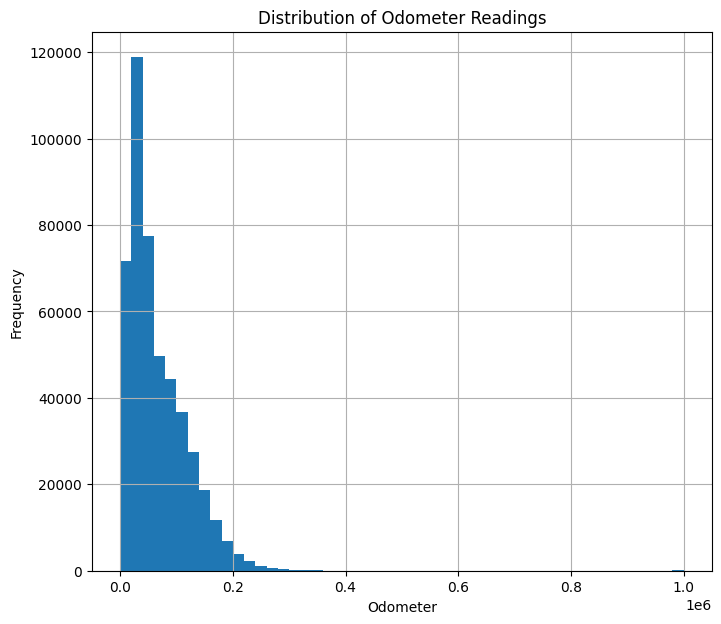

In [ ]:
# What is the distribution of odometer readings?
# Why is x axis coming out like this?
plt.figure(figsize=(8,7))
car_df['odometer'].hist(bins=50)
plt.title('Distribution of Odometer Readings')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.show()

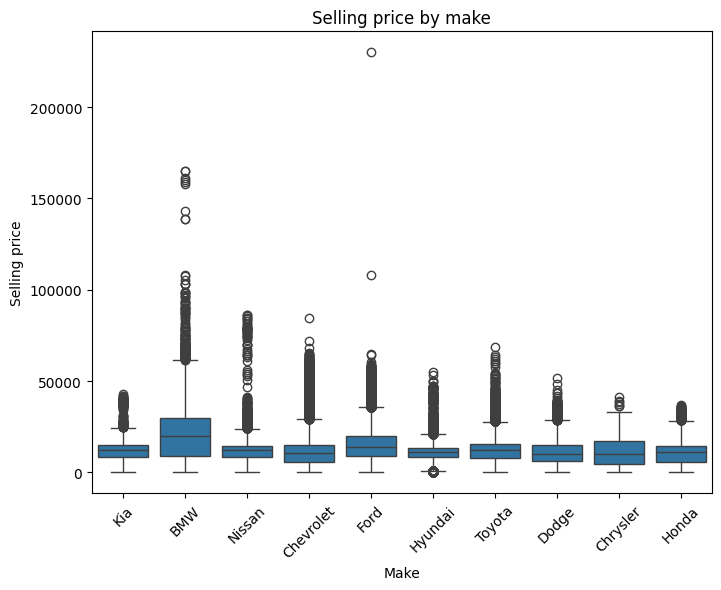

In [ ]:
# How does the selling price vary across the top 10 car makes?
top_10 = car_df['make'].value_counts().head(10).index
plt.figure(figsize=(8,6))
sns.boxplot( x ='make', y = 'sellingprice', data = car_df[car_df['make'].isin(top_10)])
plt.title('Selling price by make')
plt.xlabel('Make')
plt.ylabel('Selling price')
plt.xticks(rotation = 45)
plt.show()

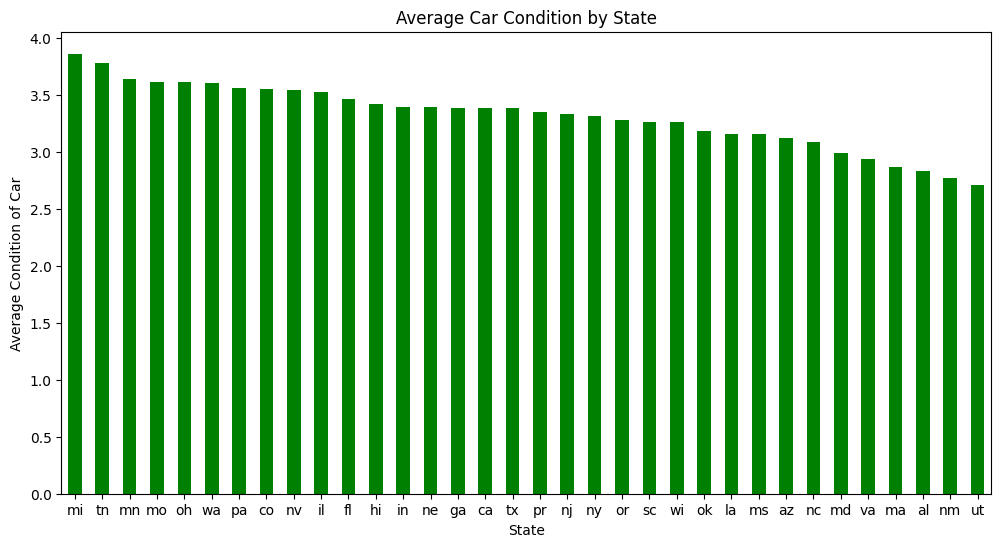

In [ ]:
# Does the state affect the average condition of the cars sold?

plt.figure(figsize=(12,6))
avg_cond_per_state = car_df.groupby('state')['condition'].mean().sort_values(ascending=False)
avg_cond_per_state.plot(kind='bar', color = 'green')
plt.title('Average Car Condition by State')
plt.xlabel('State')
plt.ylabel('Average Condition of Car')
plt.xticks(rotation = 360)
plt.show()

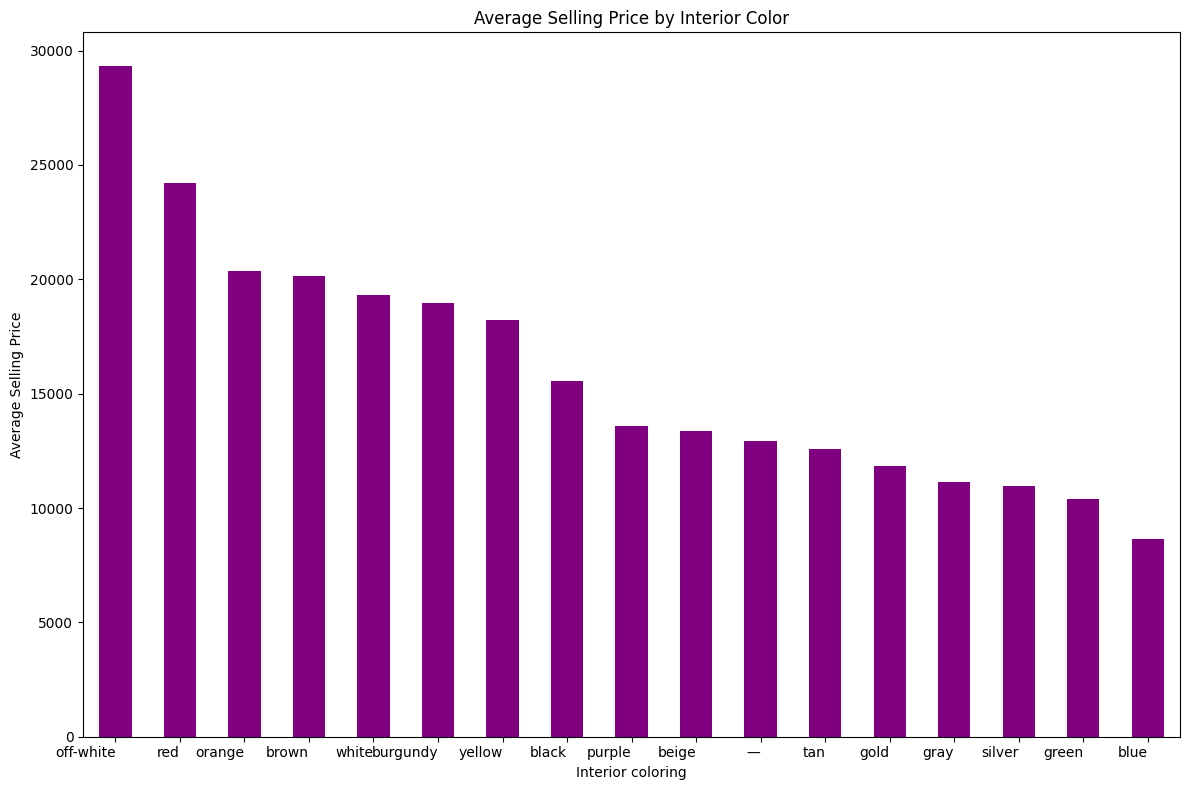

In [ ]:
# Does the interior affect the selling price?
avg_price_by_interior = car_df.groupby('interior')['sellingprice'].mean().sort_values(ascending= False)
plt.figure(figsize=(12, 8))
avg_price_by_interior.plot(kind = 'bar', color = 'purple')
plt.title('Average Selling Price by Interior Color')
plt.xlabel('Interior coloring')
plt.ylabel('Average Selling Price')
plt.xticks(rotation = 0, ha = 'right')
plt.tight_layout()
plt.show()


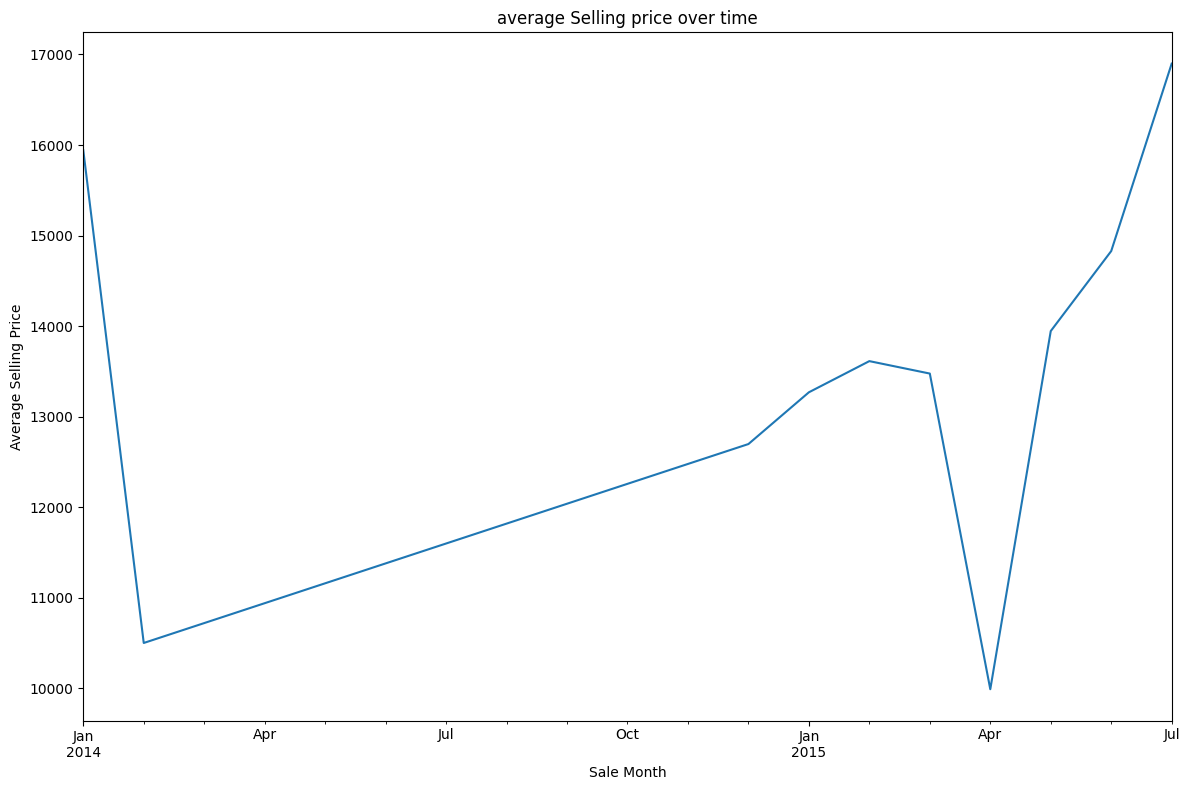

In [ ]:
# How has the selling price changed over time?

car_df['saledate'] = pd.to_datetime(car_df['saledate'], errors = 'coerce')
car_df['sale_month_year'] = car_df['saledate'].dt.to_period('M')
avg_price_over_time = car_df.groupby('sale_month_year')['sellingprice'].mean()

plt.figure(figsize= (12,8))
avg_price_over_time.plot()
plt.title('average Selling price over time')
plt.xlabel('Sale Month')
plt.ylabel('Average Selling Price')
plt.xticks( rotation = 0)
plt.tight_layout()
plt.show()

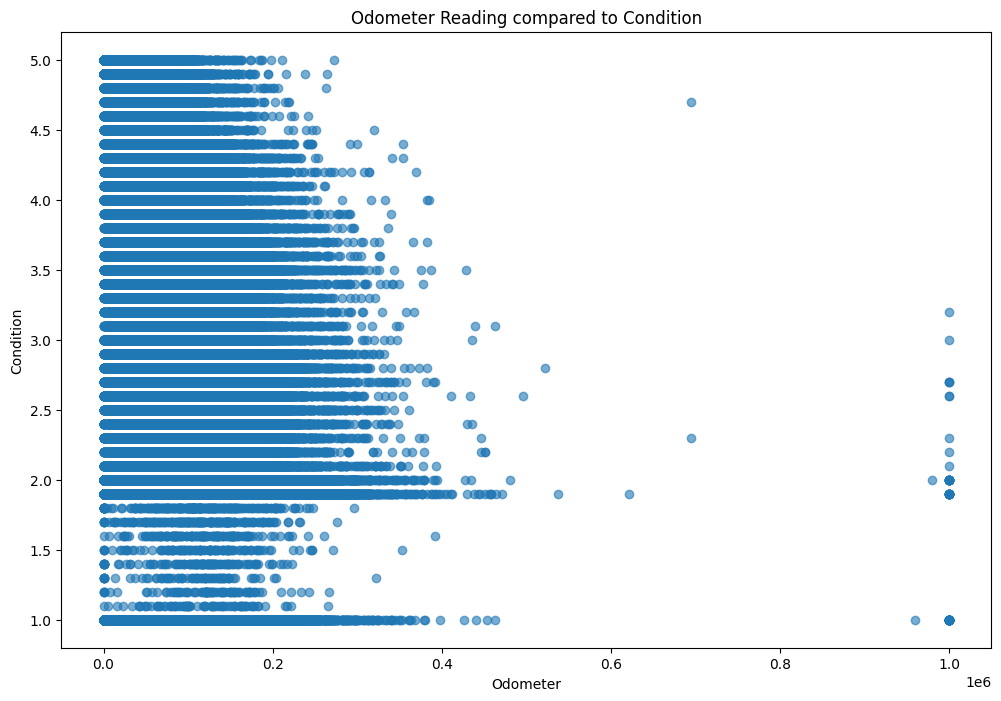

In [ ]:
# Is there a relationshiip between odometer reading and car condition?
# Why doesn't odometer show as actual miles?
plt.figure(figsize=(12,8))
plt.scatter(car_df['odometer'], car_df['condition'], alpha= .6)
plt.title('Odometer Reading compared to Condition')
plt.xlabel('Odometer')
plt.ylabel('Condition')
plt.show()

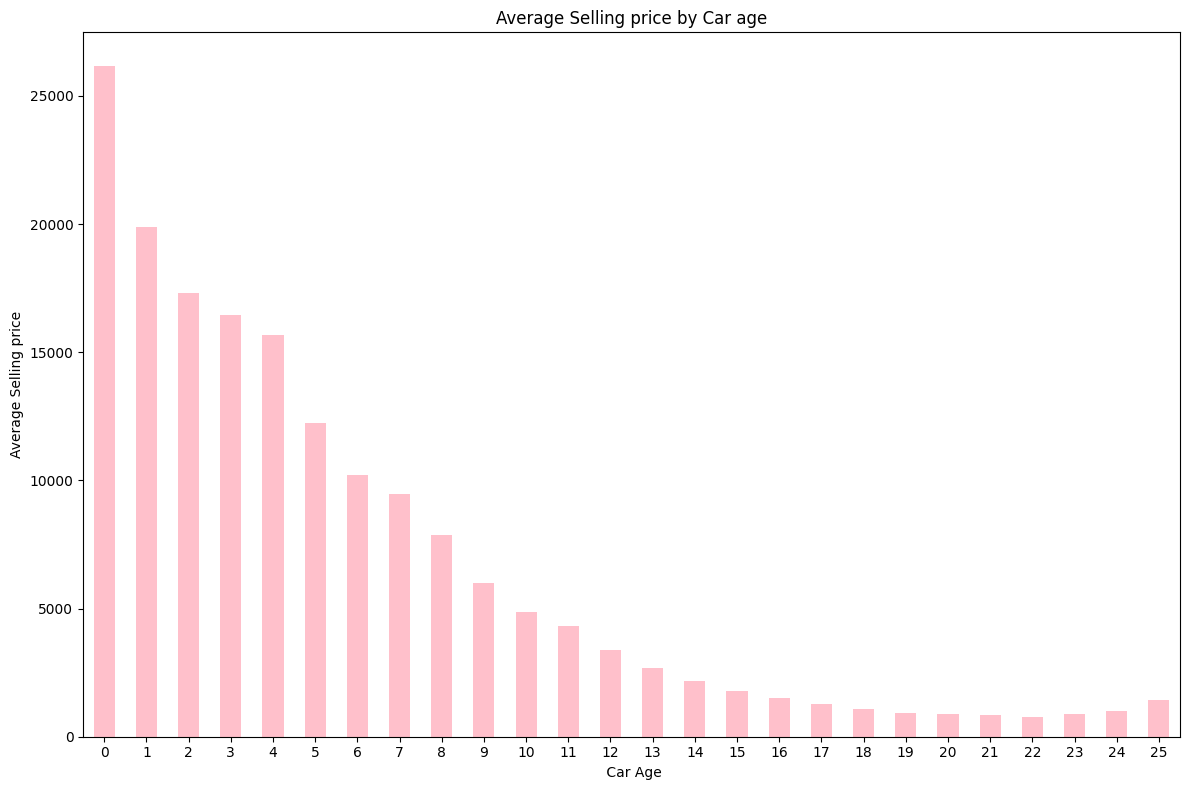

In [ ]:
# What is the average selling price by car age?

avg_price_by_age = car_df.groupby('car_age')['sellingprice'].mean()
plt.figure(figsize=(12,8))
avg_price_by_age.plot(kind = 'bar', color = 'pink')
plt.title('Average Selling price by Car age')
plt.xlabel(' Car Age')
plt.ylabel('Average Selling price')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

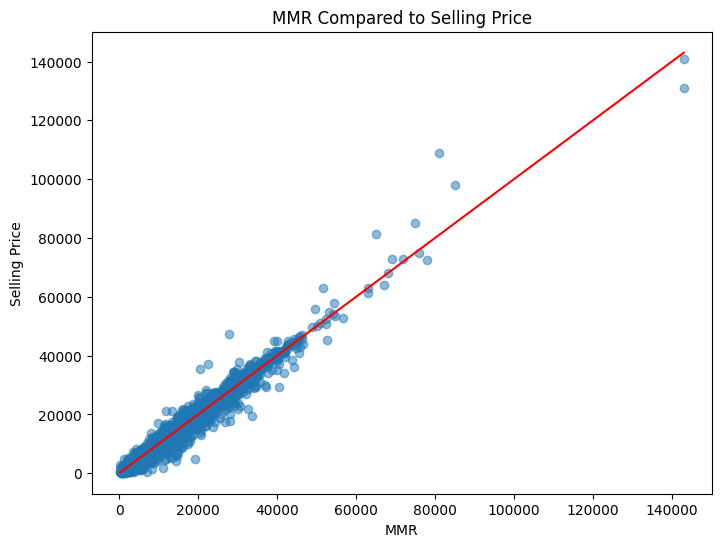

In [ ]:
# Is there a relationship between mmr and selling price?
# I would assume so
car_df_sampled = car_df.sample(5000, random_state=50)

plt.figure(figsize=(8,6))
plt.scatter(car_df_sampled['mmr'], car_df_sampled['sellingprice'], alpha=0.5)
plt.plot([car_df_sampled['mmr'].min(), car_df_sampled['mmr'].max()],
         [car_df_sampled['mmr'].min(), car_df_sampled['mmr'].max()], color='red')
plt.title('MMR Compared to Selling Price')
plt.xlabel('MMR')
plt.ylabel('Selling Price')
plt.show()

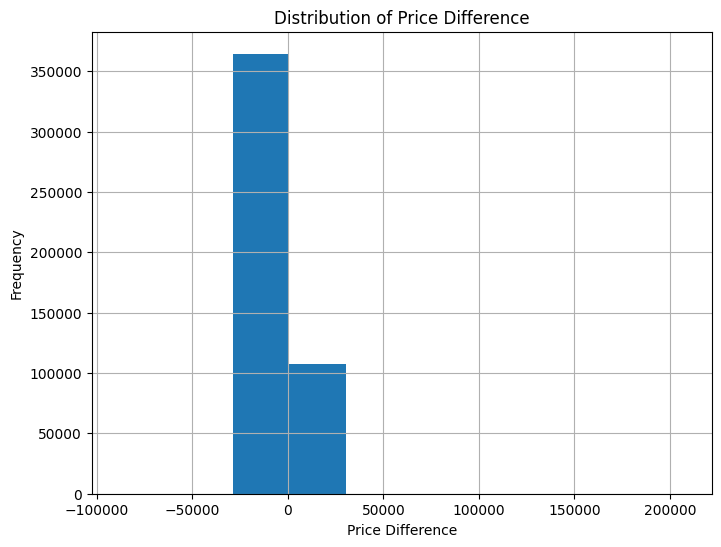

In [ ]:
# How is the selling price different from mmr?
# selling price - mmr
car_df['price_difference'] = car_df['sellingprice'] - car_df['mmr']
plt.figure(figsize=(8,6))
car_df['price_difference'].hist(bins=10)
plt.title('Distribution of Price Difference')
plt.xlabel('Price Difference')
plt.ylabel('Frequency')
plt.show()

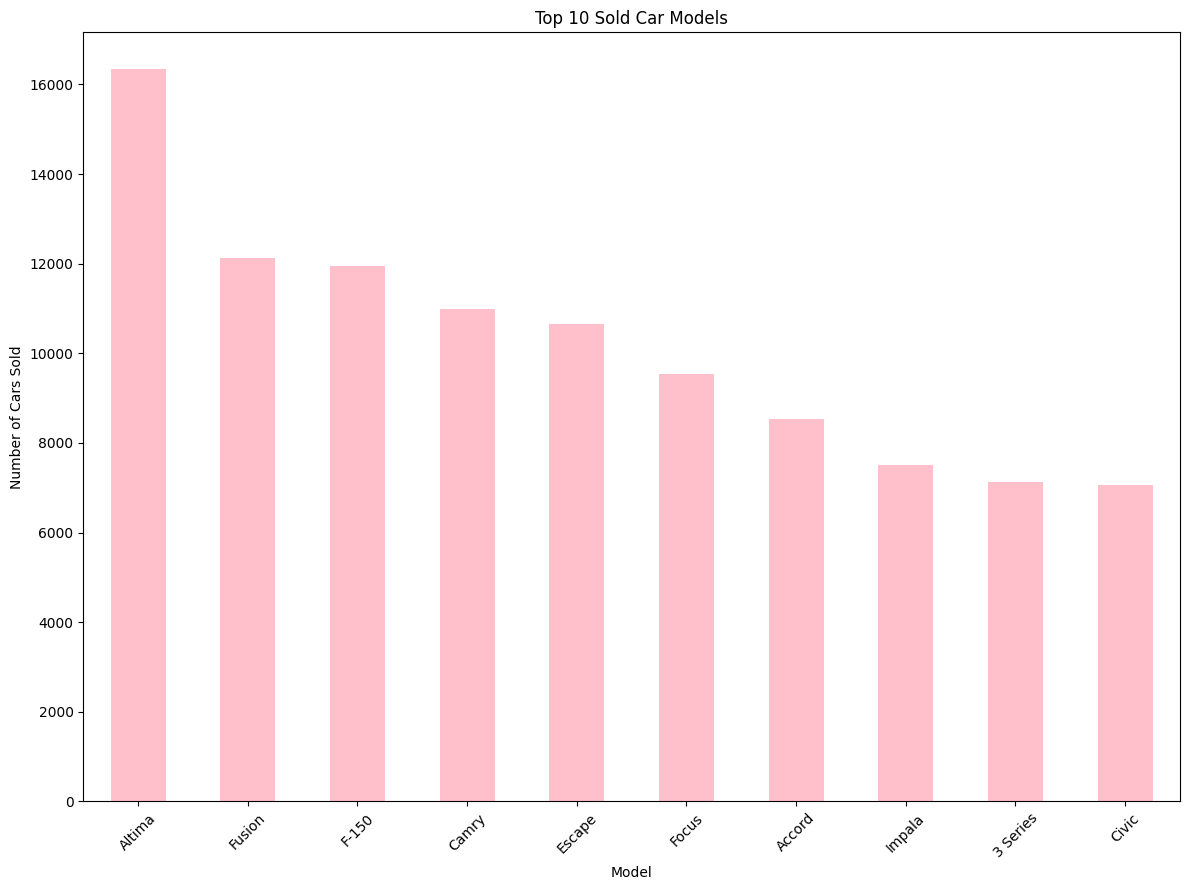

In [ ]:
# Which cars are most sold by model?
top_10_models = car_df['model'].value_counts().head(10)

plt.figure(figsize=(12,9))
top_10_models.plot(kind='bar', color='pink')
plt.title('Top 10 Sold Car Models')
plt.xlabel('Model')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

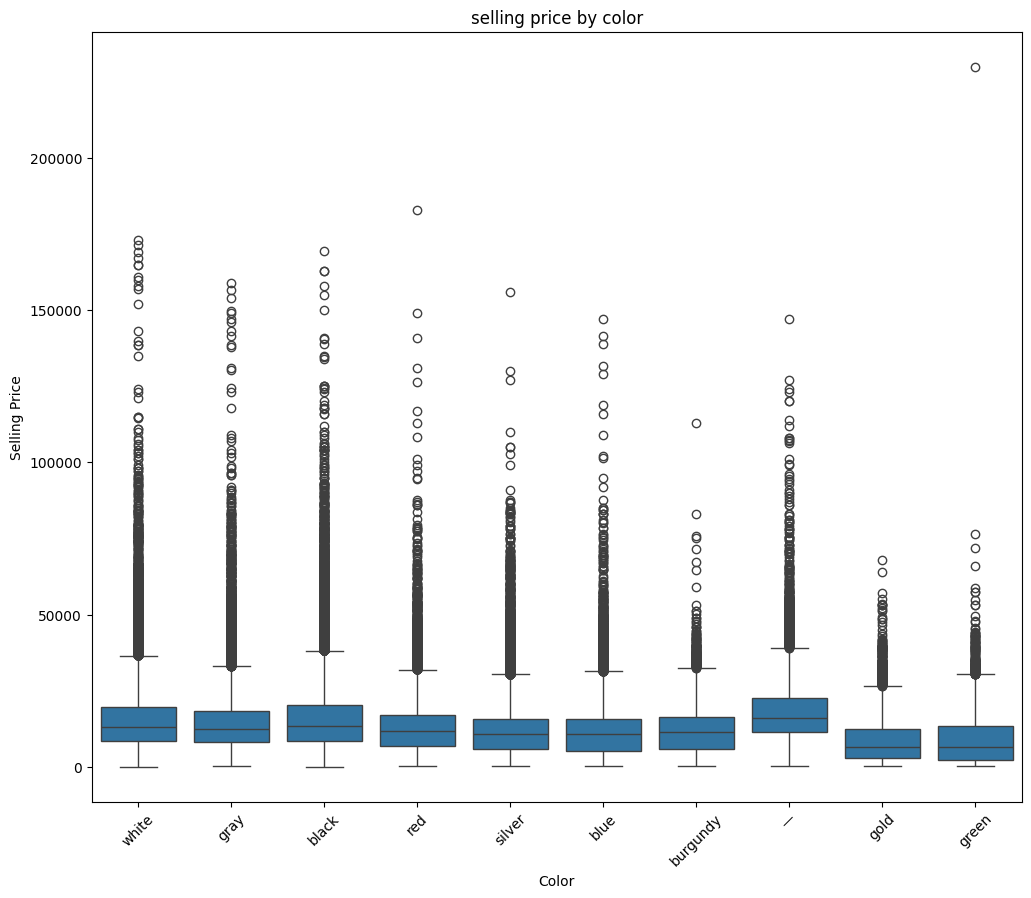

In [ ]:
# Does the color (exterior) of the car affect the price?
# only comparing top 10 colors

top_10_colors = car_df['color'].value_counts().head(10).index
plt.figure(figsize=(12, 10))
sns.boxplot(x = 'color', y = 'sellingprice', data = car_df[car_df['color'].isin(top_10_colors)])
plt.title('selling price by color')
plt.xlabel('Color')
plt.ylabel('Selling Price')
plt.xticks(rotation = 45)
plt.show()

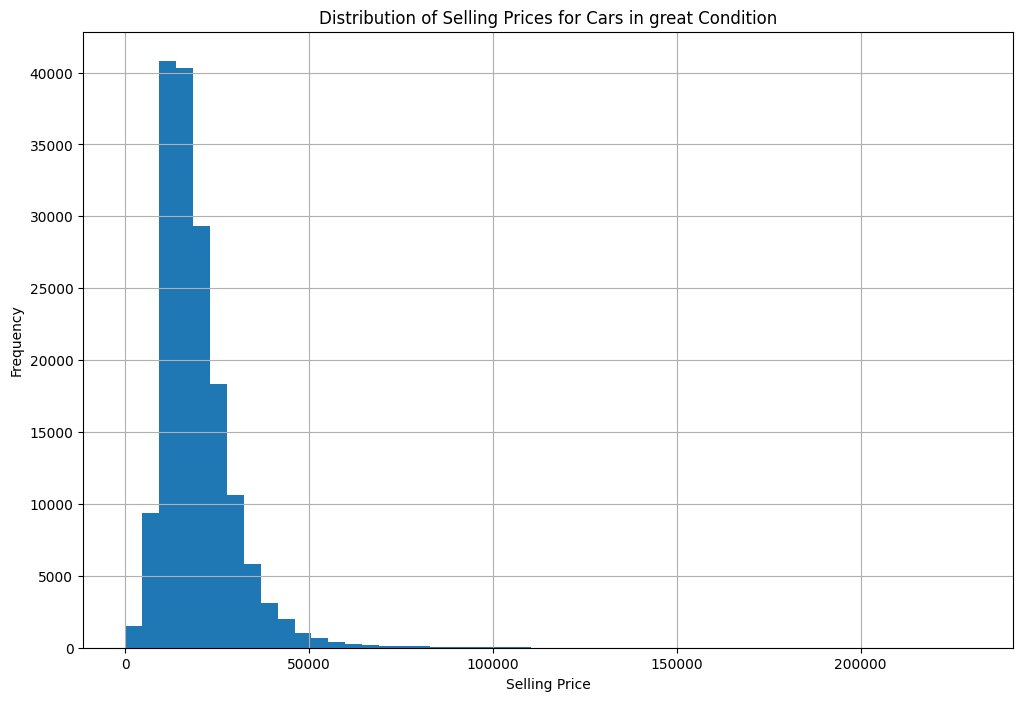

In [ ]:
# What is the spread of selling prices for cars in great condition?
# great condition meaning above 4

great_condition_cars = car_df[car_df['condition'] >= 4]
plt.figure(figsize=(12,8))
great_condition_cars['sellingprice'].hist(bins=50)
plt.title('Distribution of Selling Prices for Cars in great Condition')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')

plt.show()

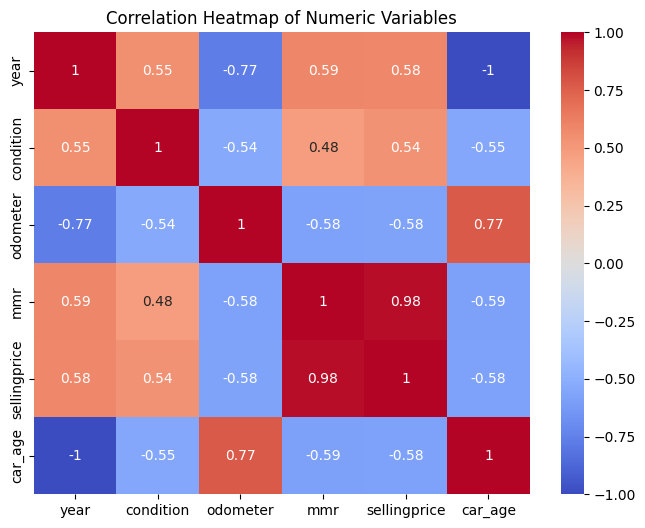

In [ ]:
# Can we draw any correlations between the current numerical data?
numeric_cols = ['year', 'condition', 'odometer', 'mmr', 'sellingprice', 'car_age']
corr_matrix = car_df[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

## Introduction of Google Trends Data: Searching for patterns
First I wanted to build on previous research questions I had to see if we can find patterns into the popularity index of a car to the sales of said car

In [ ]:
#Here we check the best selling cars
car_df['make_model'] = car_df['make'] + ' ' + car_df['model']

overall_sales = car_df.groupby('make_model').size().reset_index(name='total_sales')

best_selling_cars = overall_sales.sort_values(by='total_sales', ascending=False)

print("Best Selling Cars Overall:")
print(best_selling_cars)




Best Selling Cars Overall:
                          make_model  total_sales
585                    Nissan Altima        16346
262                      Ford Fusion        12117
249                       Ford F-150        11950
706                     Toyota Camry        10986
240                      Ford Escape        10656
..                               ...          ...
134                Chevrolet Corsica            1
54                      BMW 8 Series            1
81   Bentley Continental Supersports            1
80     Bentley Continental GTC Speed            1
24                           Audi Q3            1

[776 rows x 2 columns]


Here I look at the top three best sellers because I thought it was odd that Altima and F-150 dominated, so in the next few blocks I removed some dominant Dealerships to see if there is much of a change

In [ ]:
car_df['saledate'] = pd.to_datetime(car_df['saledate'])

#Extract the month and year from 'saledate'
car_df['month'] = car_df['saledate'].dt.to_period('M')

#Create a new colummn for the make-model combination
car_df['make_model'] = car_df['make'] + ' ' + car_df['model']

#Group by month and make_model, then count the number of sales
monthly_sales = car_df.groupby(['month', 'make_model']).size().reset_index(name='sales')

#Get the top 3 selling cars for each month WITHOUT! resetting the index
top_3_sales = monthly_sales.groupby('month').apply(lambda x: x.nlargest(3, 'sales'))
print(top_3_sales)


                month     make_model  sales
month                                      
2014-01 24    2014-01    Ford Escape     28
        23    2014-01      Ford Edge     14
        30    2014-01     Ford Focus     14
2014-02 73    2014-02        Kia Rio      1
2014-12 554   2014-12  Nissan Altima   1256
        657   2014-12   Toyota Camry   1025
        324   2014-12   Honda Accord    916
2015-01 1243  2015-01  Nissan Altima   4120
        939   2015-01     Ford F-150   3063
        951   2015-01    Ford Fusion   3008
2015-02 1956  2015-02  Nissan Altima   5348
        1662  2015-02    Ford Fusion   3807
        1649  2015-02     Ford F-150   3725
2015-03 2608  2015-03  Nissan Altima   1600
        2338  2015-03    Ford Fusion   1114
        2326  2015-03     Ford F-150   1086
2015-04 2975  2015-04  Nissan Altima     50
        2868  2015-04    Ford Fusion     39
        3024  2015-04   Toyota Camry     30
2015-05 3543  2015-05  Nissan Altima   1297
        3262  2015-05    Ford Fu

C:\Users\xxway\AppData\Local\Temp\ipykernel_13032\3218038791.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_sales = monthly_sales.groupby('month').apply(lambda x: x.nlargest(3, 'sales'))


Top 3 Sales DataFrame after resetting index:
      month     make_model  sales
0  2014-01    Ford Escape     28
1  2014-01      Ford Edge     14
2  2014-01     Ford Focus     14
3  2014-02        Kia Rio      1
4  2014-12  Nissan Altima   1256


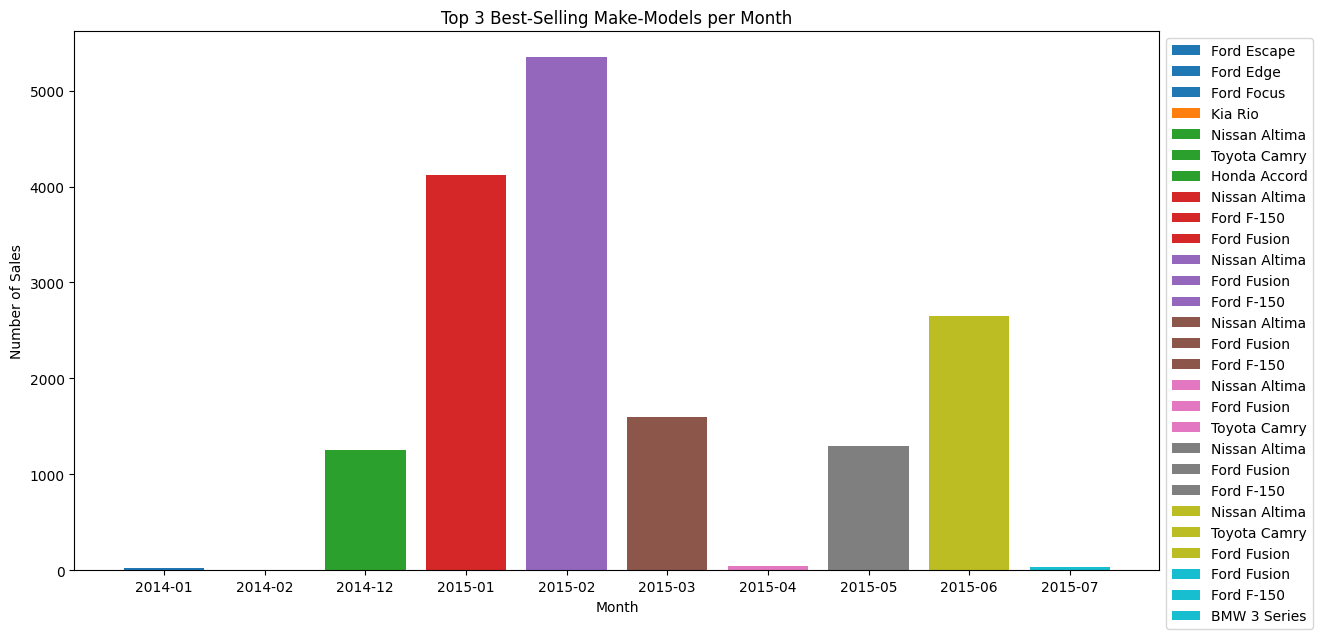

In [ ]:
top_3_sales_copy = top_3_sales.copy()
# I did not want to reset the index for everything moving forward so I created a copy
top_3_sales_copy_reset = top_3_sales_copy.reset_index(drop=True)

print("Top 3 Sales DataFrame after resetting index:\n", top_3_sales_copy_reset.head())

plot_data = top_3_sales_copy_reset

plt.figure(figsize=(14, 7))

for month in plot_data['month'].unique():
    month_data = plot_data[plot_data['month'] == month]
    plt.bar(month_data['month'].astype(str), month_data['sales'], label=month_data['make_model'].values)


plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.title('Top 3 Best-Selling Make-Models per Month')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # This Placess the legend outside the plot
plt.show()

Total Sales Per Seller:
                             seller  total_sales
10678        the hertz corporation        16286
9784            santander consumer        14245
1238              avis corporation        11471
7677            nissan infiniti lt         9350
11650  wells fargo dealer services         7999
...                            ...          ...
11920         zippy rent a car llc            1
6227            law auto group inc            1
11922                zuma autoboat            1
11923      zumbrota ford sales llc            1
10941           tj auto sales corp            1

[11925 rows x 2 columns]


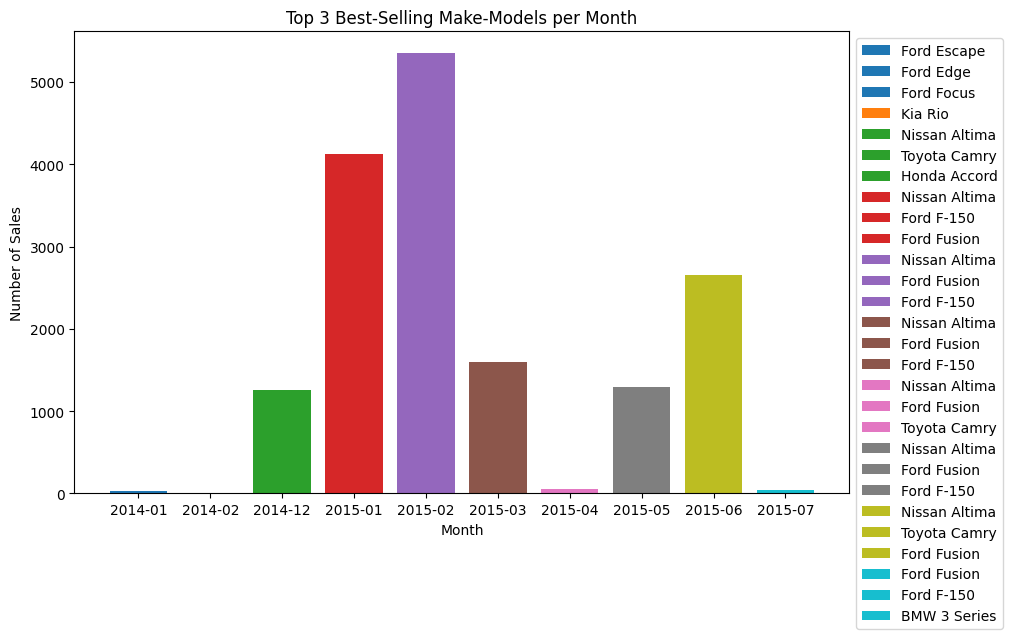

Total Sales Per Seller After Filtering:
                             seller  total_sales
10678        the hertz corporation        16286
9784            santander consumer        14245
1238              avis corporation        11471
7677            nissan infiniti lt         9350
11650  wells fargo dealer services         7999
...                            ...          ...
11920         zippy rent a car llc            1
6227            law auto group inc            1
11922                zuma autoboat            1
11923      zumbrota ford sales llc            1
10941           tj auto sales corp            1

[11925 rows x 2 columns]


In [ ]:
#This is pretty much the same code but I removed two large influences and got the same results
car_df_filtered_copy = car_df.copy()
sellers_to_drop = ["ford motor credit company,llc", "nissan-infiniti lt"]
car_df_filtered = car_df_filtered_copy[~car_df_filtered_copy['seller'].isin(sellers_to_drop)]

#This Calculate total sales per seller
total_sales_per_seller = car_df_filtered.groupby('seller').size().reset_index(name='total_sales')
total_sales_per_seller = total_sales_per_seller.sort_values(by='total_sales', ascending=False)

print("Total Sales Per Seller:\n", total_sales_per_seller)

plt.figure(figsize=(10, 6))

#Loop through the top 3 for each month
for month in top_3_sales['month'].unique():
    month_data = top_3_sales[top_3_sales['month'] == month]
    plt.bar(month_data['month'].astype(str), month_data['sales'], label=month_data['make_model'].values)

plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.title('Top 3 Best-Selling Make-Models per Month')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

print("Total Sales Per Seller After Filtering:\n", total_sales_per_seller)

In [ ]:
#F-150's still seem to be very dominant, lets see who sells the most to make sure we dont have a flaw in the data

f150_sales = car_df[car_df['model'] == 'F-150']

#Group by seller and count the number of F-150 sales
f150_sales_by_seller = f150_sales.groupby('seller').size().reset_index(name='total_sales')
f150_sales_by_seller = f150_sales_by_seller.sort_values(by='total_sales', ascending=False)

print("Total Ford F-150 Sales by Seller:")
print(f150_sales_by_seller)

#Hopefully now with this data we can analyze the google trends popularity index and find some patterns

Total Ford F-150 Sales by Seller:
                               seller  total_sales
649     ford motor credit company,llc         1572
1637                           u-haul          666
135            automobiles paille inc          419
652       ford-lincoln dealer program          401
1553                 tdaf remarketing          276
...                               ...          ...
1743            zmax moto leasing inc            1
1741                zimbrick eastside            1
1739              zeibak auto trading            1
1737  zappone chrysler jeep dodge inc            1
1736         yucca valley ford center            1

[1745 rows x 2 columns]


### Re-Formatting the google trends data

In [ ]:
# Check the first few rows and columns of each DataFrame
print("Ford F-150 DataFrame:")
print(onefifty_df.head())
print(onefifty_df.columns)

print("\nToyota Camry DataFrame:")
print(camry_df.head())
print(camry_df.columns)

print("\nNissan Altima DataFrame:")
print(altima_df.head())
print(altima_df.columns)


Ford F-150 DataFrame:
               Category: All categories
Week        Ford F-150: (United States)
2013-12-29                           59
2014-01-05                           55
2014-01-12                          100
2014-01-19                           66
Index(['Category: All categories'], dtype='object')

Toyota Camry DataFrame:
                 Category: All categories
Week        Toyota Camry: (United States)
2013-12-29                             63
2014-01-05                             59
2014-01-12                             60
2014-01-19                             58
Index(['Category: All categories'], dtype='object')

Nissan Altima DataFrame:
                  Category: All categories
Week        Nissan Altima: (United States)
2013-12-29                              80
2014-01-05                              79
2014-01-12                              80
2014-01-19                              80
Index(['Category: All categories'], dtype='object')


In [ ]:
# Reset the index to get the dates into a column
onefifty_df_reset = onefifty_df.reset_index()
camry_df_reset = camry_df.reset_index()
altima_df_reset = altima_df.reset_index()

# Rename the columns for easier access
onefifty_df_reset.columns = ['date', 'popularity']
camry_df_reset.columns = ['date', 'popularity']
altima_df_reset.columns = ['date', 'popularity']

In [ ]:
# Reset the index for each DataFrame to make the 'Week' column accessible
onefifty_df_reset = onefifty_df.reset_index()
camry_df_reset = camry_df.reset_index()
altima_df_reset = altima_df.reset_index()

# The first column is the 'Week' column. Rename it to 'date' for clarity.
onefifty_df_reset.columns = ['date', 'popularity']
camry_df_reset.columns = ['date', 'popularity']
altima_df_reset.columns = ['date', 'popularity']

# Ensure that the 'date' column contains only the date information, and strip any leading/trailing whitespace
onefifty_df_reset['date'] = onefifty_df_reset['date'].str.replace('Week', '').str.strip()
camry_df_reset['date'] = camry_df_reset['date'].str.replace('Week', '').str.strip()
altima_df_reset['date'] = altima_df_reset['date'].str.replace('Week', '').str.strip()

# Convert the 'date' column to datetime format
onefifty_df_reset['date'] = pd.to_datetime(onefifty_df_reset['date'])
camry_df_reset['date'] = pd.to_datetime(camry_df_reset['date'])
altima_df_reset['date'] = pd.to_datetime(altima_df_reset['date'])

# Print the updated DataFrames to verify the changes
print("Ford F-150 DataFrame:\n", onefifty_df_reset.head())
print("Toyota Camry DataFrame:\n", camry_df_reset.head())
print("Nissan Altima DataFrame:\n", altima_df_reset.head())


Ford F-150 DataFrame:
         date                   popularity
0        NaT  Ford F-150: (United States)
1 2013-12-29                           59
2 2014-01-05                           55
3 2014-01-12                          100
4 2014-01-19                           66
Toyota Camry DataFrame:
         date                     popularity
0        NaT  Toyota Camry: (United States)
1 2013-12-29                             63
2 2014-01-05                             59
3 2014-01-12                             60
4 2014-01-19                             58
Nissan Altima DataFrame:
         date                      popularity
0        NaT  Nissan Altima: (United States)
1 2013-12-29                              80
2 2014-01-05                              79
3 2014-01-12                              80
4 2014-01-19                              80


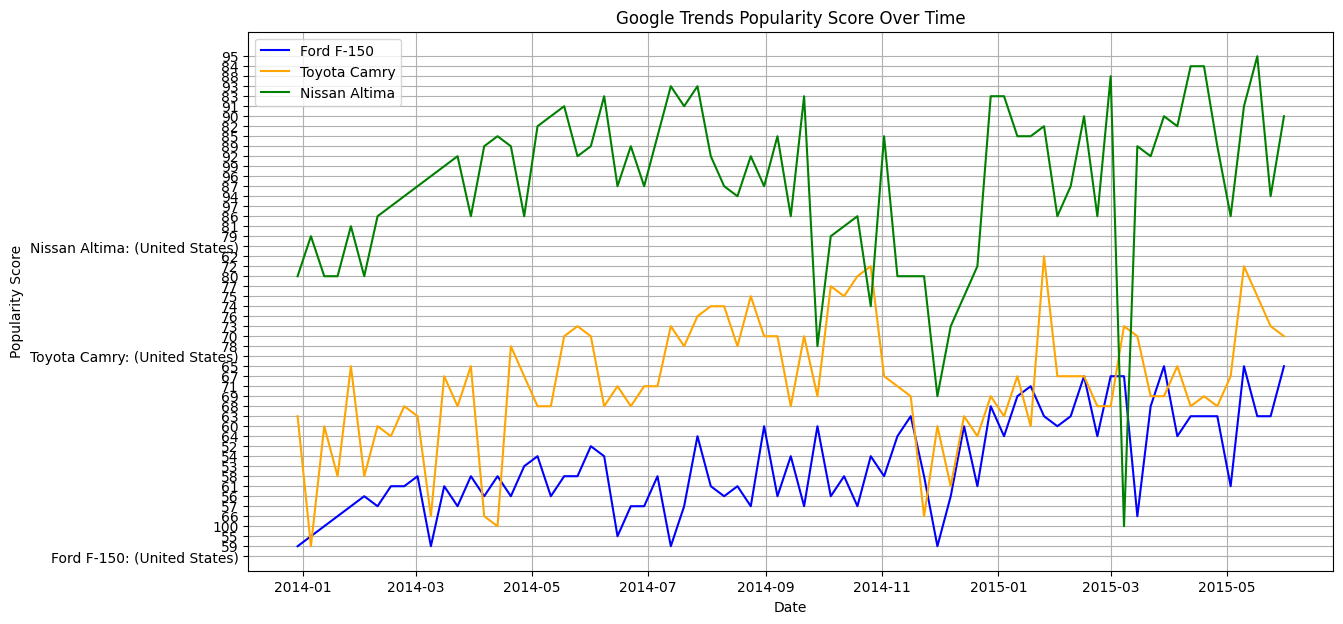

In [ ]:
#Data looks okay, we can move forward with plotting
plt.figure(figsize=(14, 7))

plt.plot(onefifty_df_reset['date'], onefifty_df_reset['popularity'], label='Ford F-150', color='blue')
plt.plot(camry_df_reset['date'], camry_df_reset['popularity'], label='Toyota Camry', color='orange')
plt.plot(altima_df_reset['date'], altima_df_reset['popularity'], label='Nissan Altima', color='green')

plt.title('Google Trends Popularity Score Over Time')
plt.xlabel('Date')
plt.ylabel('Popularity Score')
plt.legend()
plt.grid()

plt.show()

In [ ]:
##Need to figure out how to plot my altima sales data nicely